In [1]:
import h5py
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from skimage.segmentation import find_boundaries

In [2]:
hf = h5py.File("./data/Ben_MembraneSegmentation_NuclearGFP_2021-06-22.hdf5", "r")
print(hf.keys())

<KeysViewHDF5 ['Average GFP Masks', 'Cell Seg Mask', 'Max Projection', 'Nuc Seg Mask', 'Summed GFP Masks']>


In [3]:
cell_id = np.array(pd.read_csv("./result/crisprmap20210506_layer1out0123_cell_id_thresh6std.csv")).ravel()
cell_id

array([0, 0, 4, 0, 0, 4, 0, 4, 0, 4, 4, 8, 0, 4, 4, 4, 9, 4, 2, 4, 8, 4,
       4, 4, 8, 2, 4, 9, 4, 2, 0, 4, 0, 9, 9, 9, 8, 6, 9, 4, 5, 4, 8, 4,
       4, 4, 9, 6, 2, 7, 0, 1, 4, 4, 9, 9, 4, 4, 6, 9, 8, 4, 9, 0, 6, 6,
       4, 4, 4, 4, 1, 9, 4, 4, 4, 4, 6, 7, 1, 8, 9, 2, 9, 1, 9, 5, 0, 1,
       8, 4, 6, 1, 8, 0, 8, 4, 4, 2, 1, 9, 4, 8, 0, 2, 2, 2, 9, 9, 2, 4,
       4, 9, 4, 9, 4, 8, 4, 3, 1, 0, 4, 9, 4, 8, 4, 4, 2, 6, 7, 8, 4, 9,
       4, 8, 4, 4, 5, 4, 9, 5, 4, 6, 4, 6, 8, 8, 2, 9, 8, 2, 9, 9, 4, 8,
       4, 8, 1, 5, 4, 6, 9, 7, 0, 0, 0, 9, 2, 0, 1, 4, 9, 2, 4, 9, 1, 8,
       9, 9, 0, 0, 6, 4, 8, 8, 0, 6, 5, 4, 0, 4, 9, 6, 0, 4, 4, 0, 4, 4,
       8, 8, 0, 4, 6, 0, 0, 9, 7, 6, 7, 2, 9, 0, 9, 5, 4, 4, 7, 6, 9, 4,
       5, 8, 8, 0, 5, 9, 4, 7, 9, 0, 6, 0, 0, 7, 0, 7, 6, 1, 7, 5, 4, 9,
       6, 7, 5, 4, 5, 0, 8, 0, 9, 7, 0, 6, 6, 0, 8, 4, 6, 6, 6, 4, 6, 9,
       0, 9, 6, 8, 0, 4, 4, 8, 9, 8, 4, 7, 0, 8, 5, 5, 0, 9, 2, 1, 1, 8,
       4, 0, 6, 9, 4, 1, 8, 4, 7, 4, 4, 4, 8, 1, 0,

In [4]:
set(cell_id)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [5]:
masks_mem = np.array(hf["Cell Seg Mask"])

In [6]:
# plt.figure(dpi=300)
# plt.imshow(masks_mem)
# plt.axis('image')

In [7]:
mask = np.zeros(masks_mem.shape)
for i, l in enumerate(cell_id[1:]):
    mask[masks_mem==i+1] = l+1  # avoid label l being 0 because the background is 0
#     print(i)
#     print(l)
    
# mask /= 10

In [8]:
np.unique(mask)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

(-0.5, 1791.5, 2047.5, -0.5)

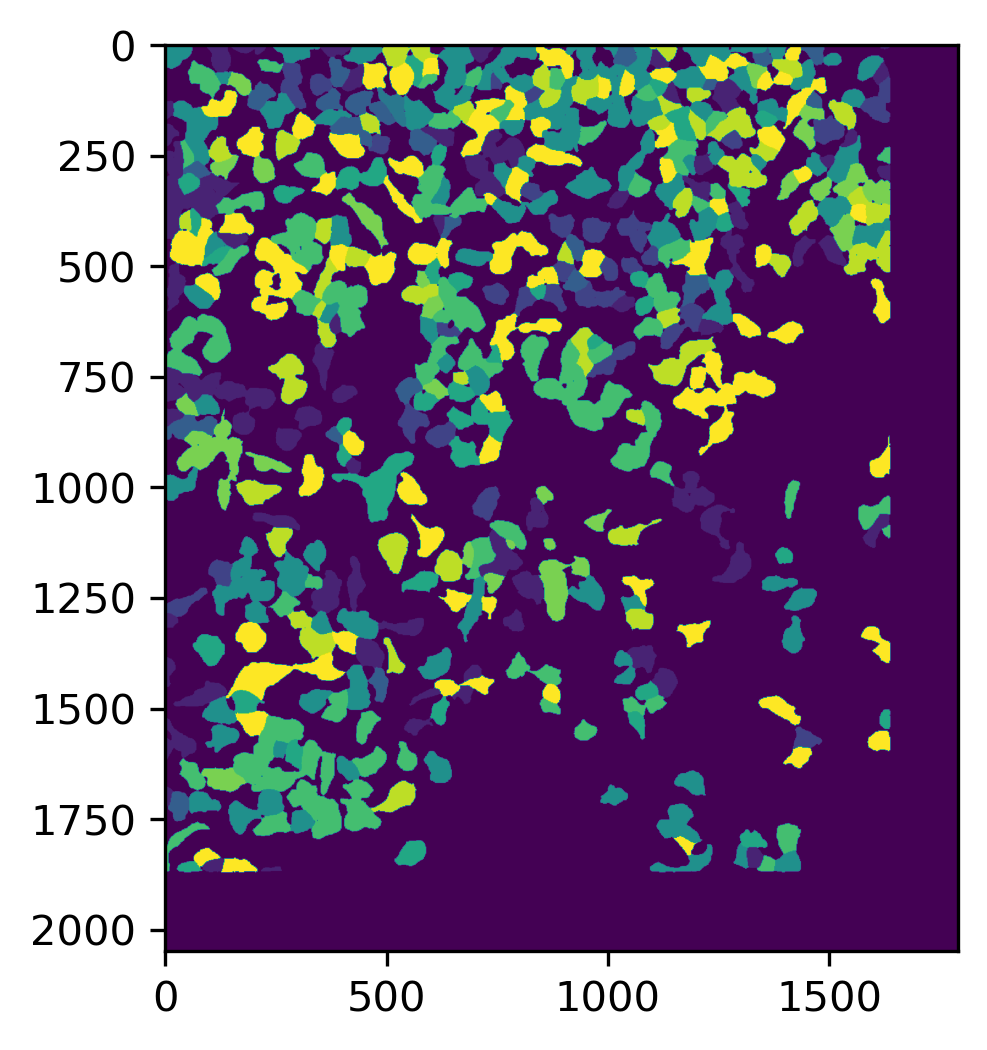

In [9]:
plt.figure(dpi=300)
plt.imshow(mask)
plt.axis('image')

In [10]:
color_dict = {
    0: (0,0,255),
    1: (0,255,0),
    2: (255, 0, 0),
    3: (0,255,255),
    4: (255,0,255),
    5: (255,255,0),
    6: (255,127,0),
    7: (0,127,0),
    8: (127,0,0),
    9: (255,255,255)
}

mask_color = np.zeros((*mask.shape, 3))
for i in range(len(color_dict)): 
    mask_color[mask==i+1] = color_dict[i]

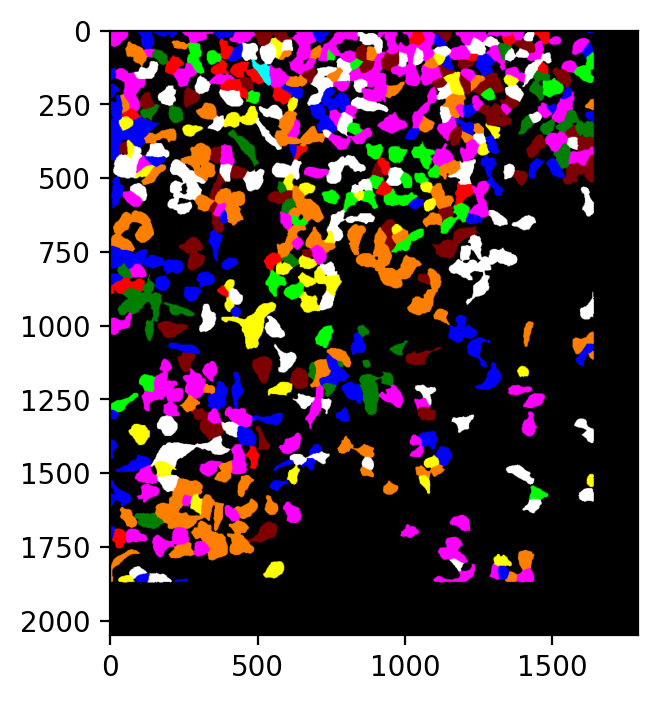

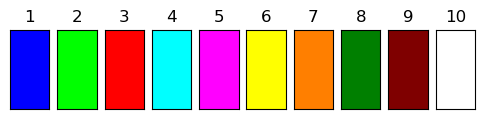

In [11]:
plt.figure(dpi=200)    
plt.imshow(mask_color.astype(np.uint8))

color_box = np.zeros((10, 5, 3))
plt.figure(dpi=100)  
for i in range(10): 
    plt.subplot(1, 10, i+1)
    color_box[:, :, :] = color_dict[i]
    plt.imshow(color_box.astype(np.uint8))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.title(i+1)

## High quality cells

## Low quality cells

In [22]:
len(color_dict)

10

In [ ]:
# for i in range(1, cell_id.shape[0]):
#     sumGFPMasks[np.where(sumGFPMasks==cell_id.index[i])] = cell_id.loc[i]

In [21]:
# sumGFPMasks[np.where(sumGFPMasks==cell_id.index[250])]

array([], shape=(0, 1792), dtype=float64)

In [19]:
# cell_id.loc[250]

0    9
Name: 250, dtype: int64

In [ ]:
# https://stackoverflow.com/questions/34321025/replace-values-in-numpy-2d-array-based-on-pandas-dataframe

In [31]:
# when getting the supposedly better one, keep the old one for comparison
test = pd.read_csv('./data/crisprmap20210506_layer1out0123_result_corr_reg_thresh72.csv')
print(np.unique(test['j']))
spotMask = np.zeros((2048, 1792, 3))
for i in range(len(test.index)):
    xindex = test.loc[i, 'm2']
    yindex = test.loc[i, 'm1']
    guideID = test.loc[i,'j']
    if guideID <= 4:
        spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (1, 0, 0) # red spots are GPP targeting (dark cells)
    else:
        spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (1, 1, 1) # white spots are control (bright/green cells)

[0 1 2 3 4 5 6 7 8 9]


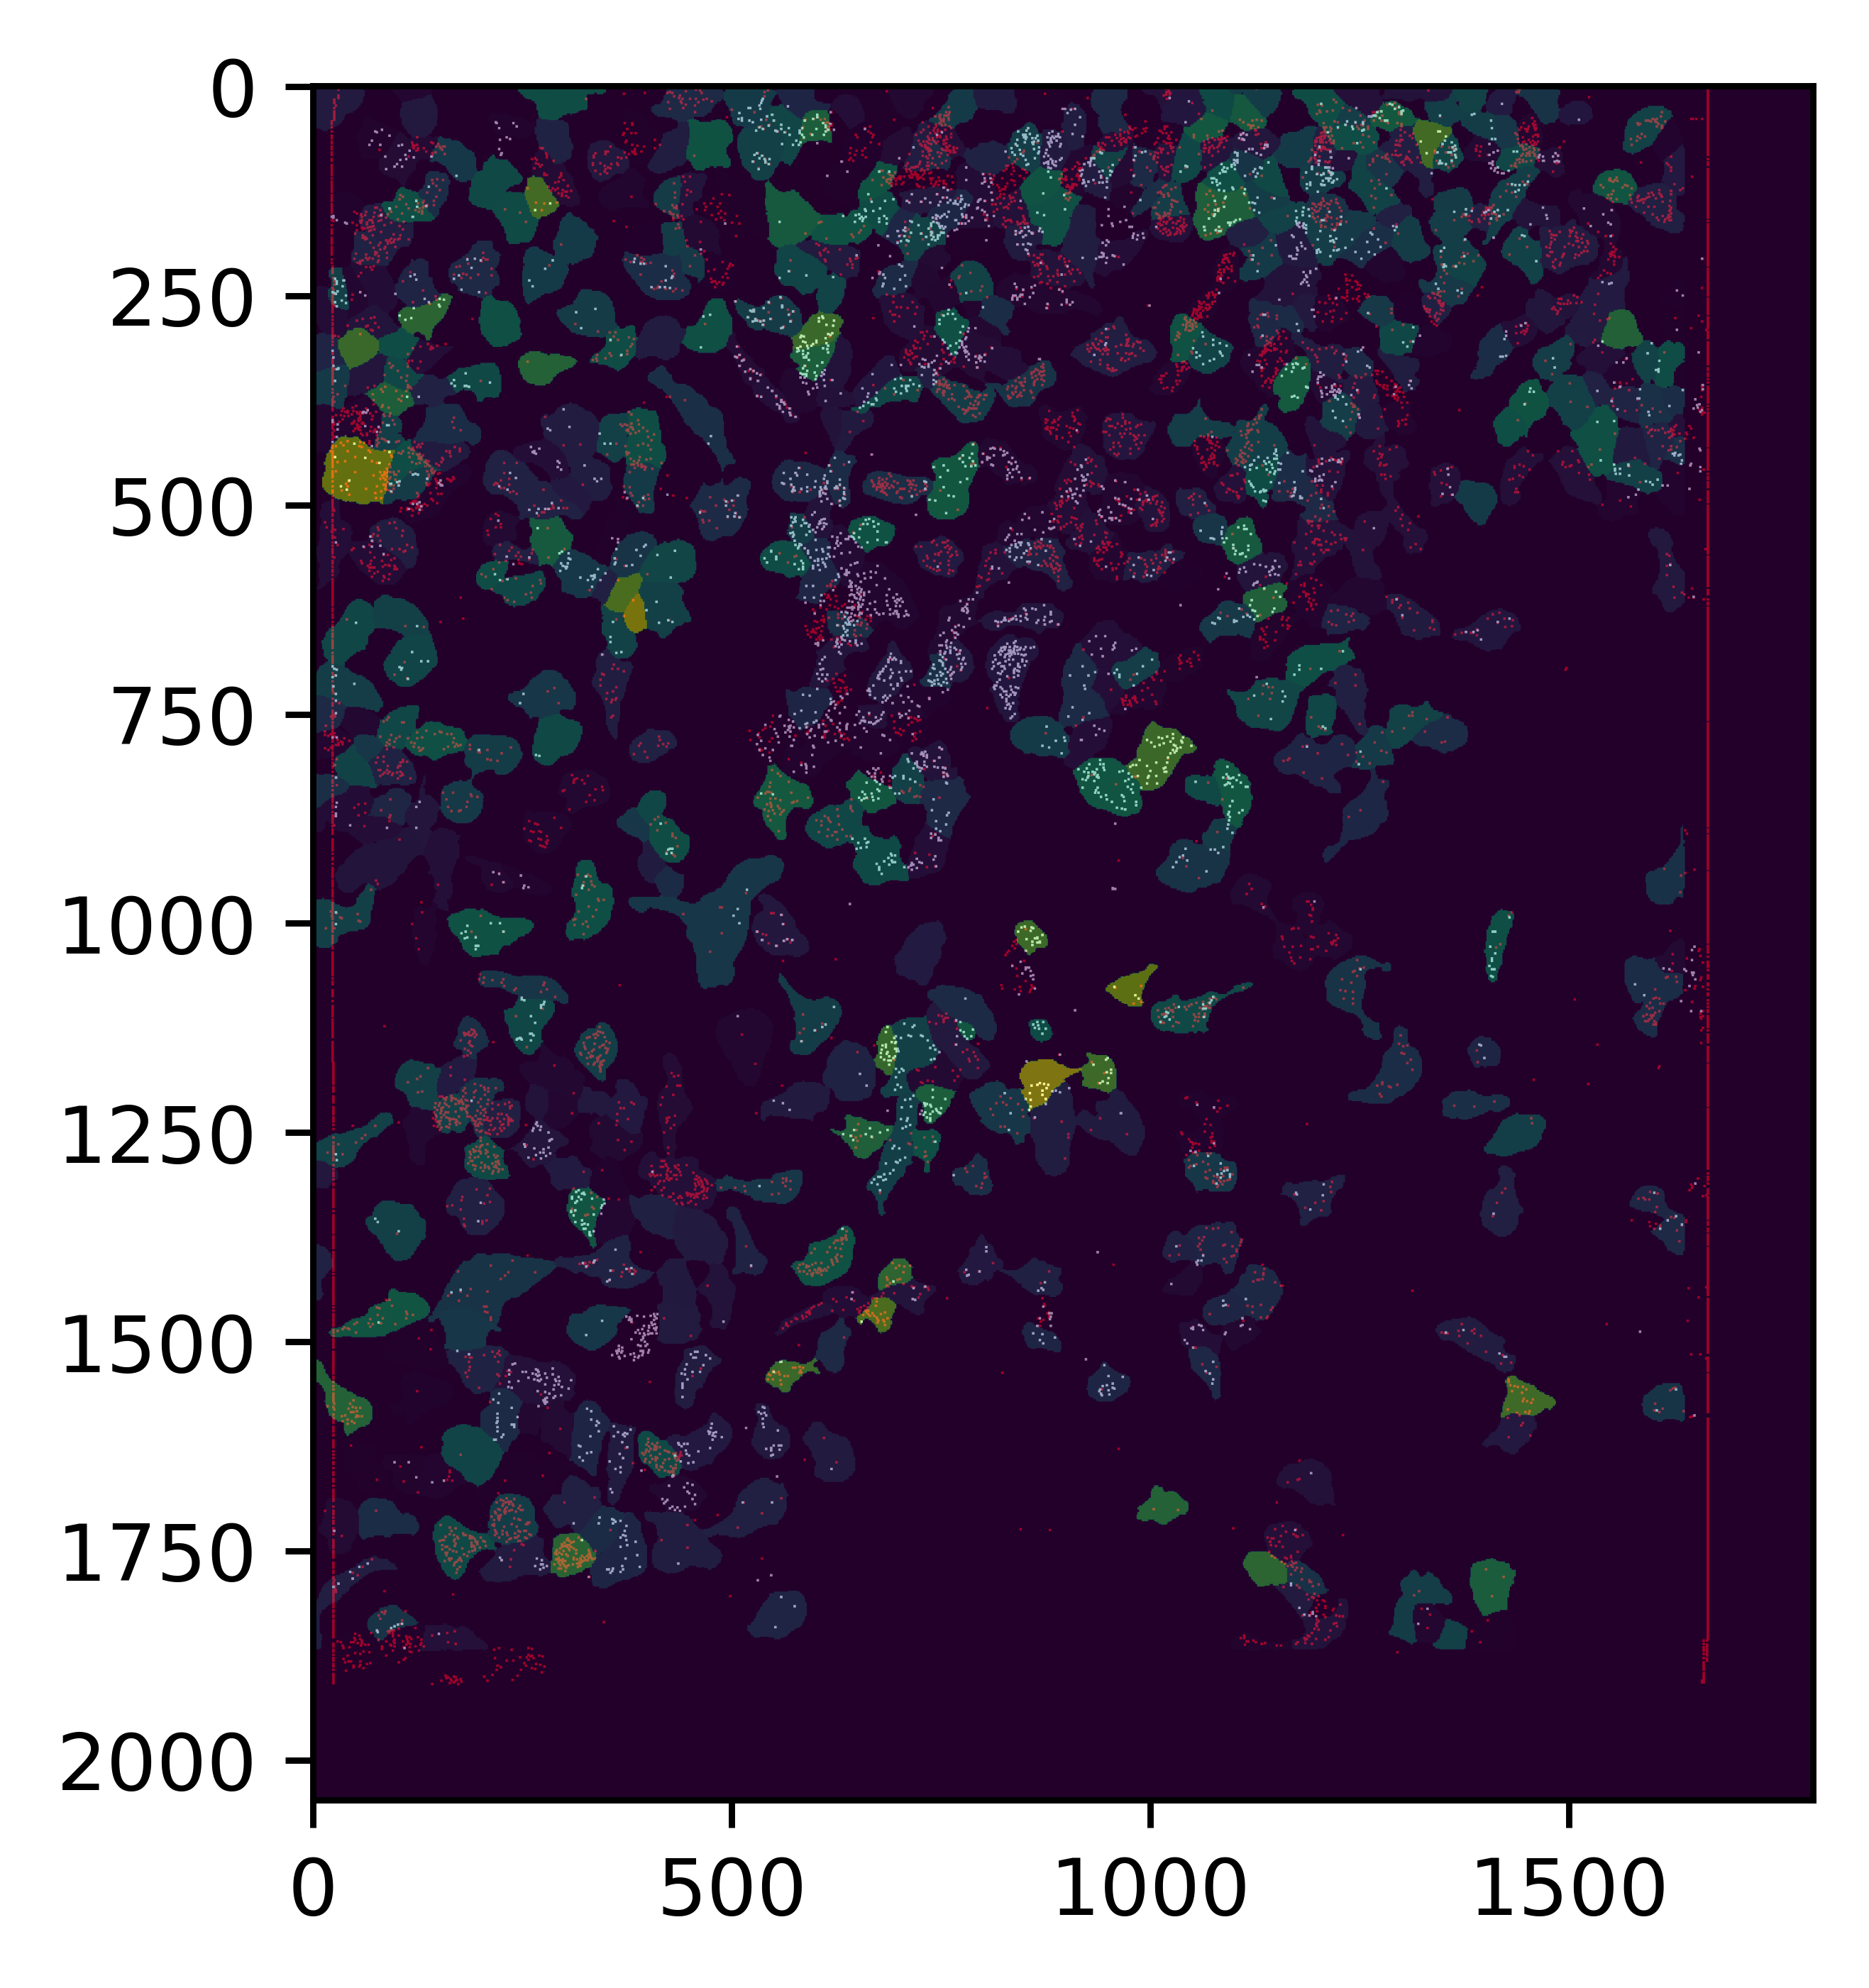

In [32]:
# when getting the supposedly better one, keep the old one for comparison
plt.figure(dpi=800)
plt.imshow(sumGFPMasks)
plt.axis('image')
plt.imshow(spotMask, alpha=0.5)

In [110]:
up = 10
down = 1900
left = 50
right = 1650

test = pd.read_csv('./data/crisprmap20210506_layer1out0123_result_corr_thresh68_preprocessed.csv')
print(np.unique(test['j']))
spotMask = np.zeros((2048, 1792, 3))
for i in range(len(test.index)):
    xindex = test.loc[i, 'm2'] + left
    yindex = test.loc[i, 'm1'] + up
    guideID = test.loc[i,'j']
    if guideID <= 4:
        spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (1, 0, 0) # red spots are GPP targeting (dark cells)
    else:
        spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (1, 1, 1) # white spots are control (bright/green cells)

[0 1 2 4 5 6 7 8 9]


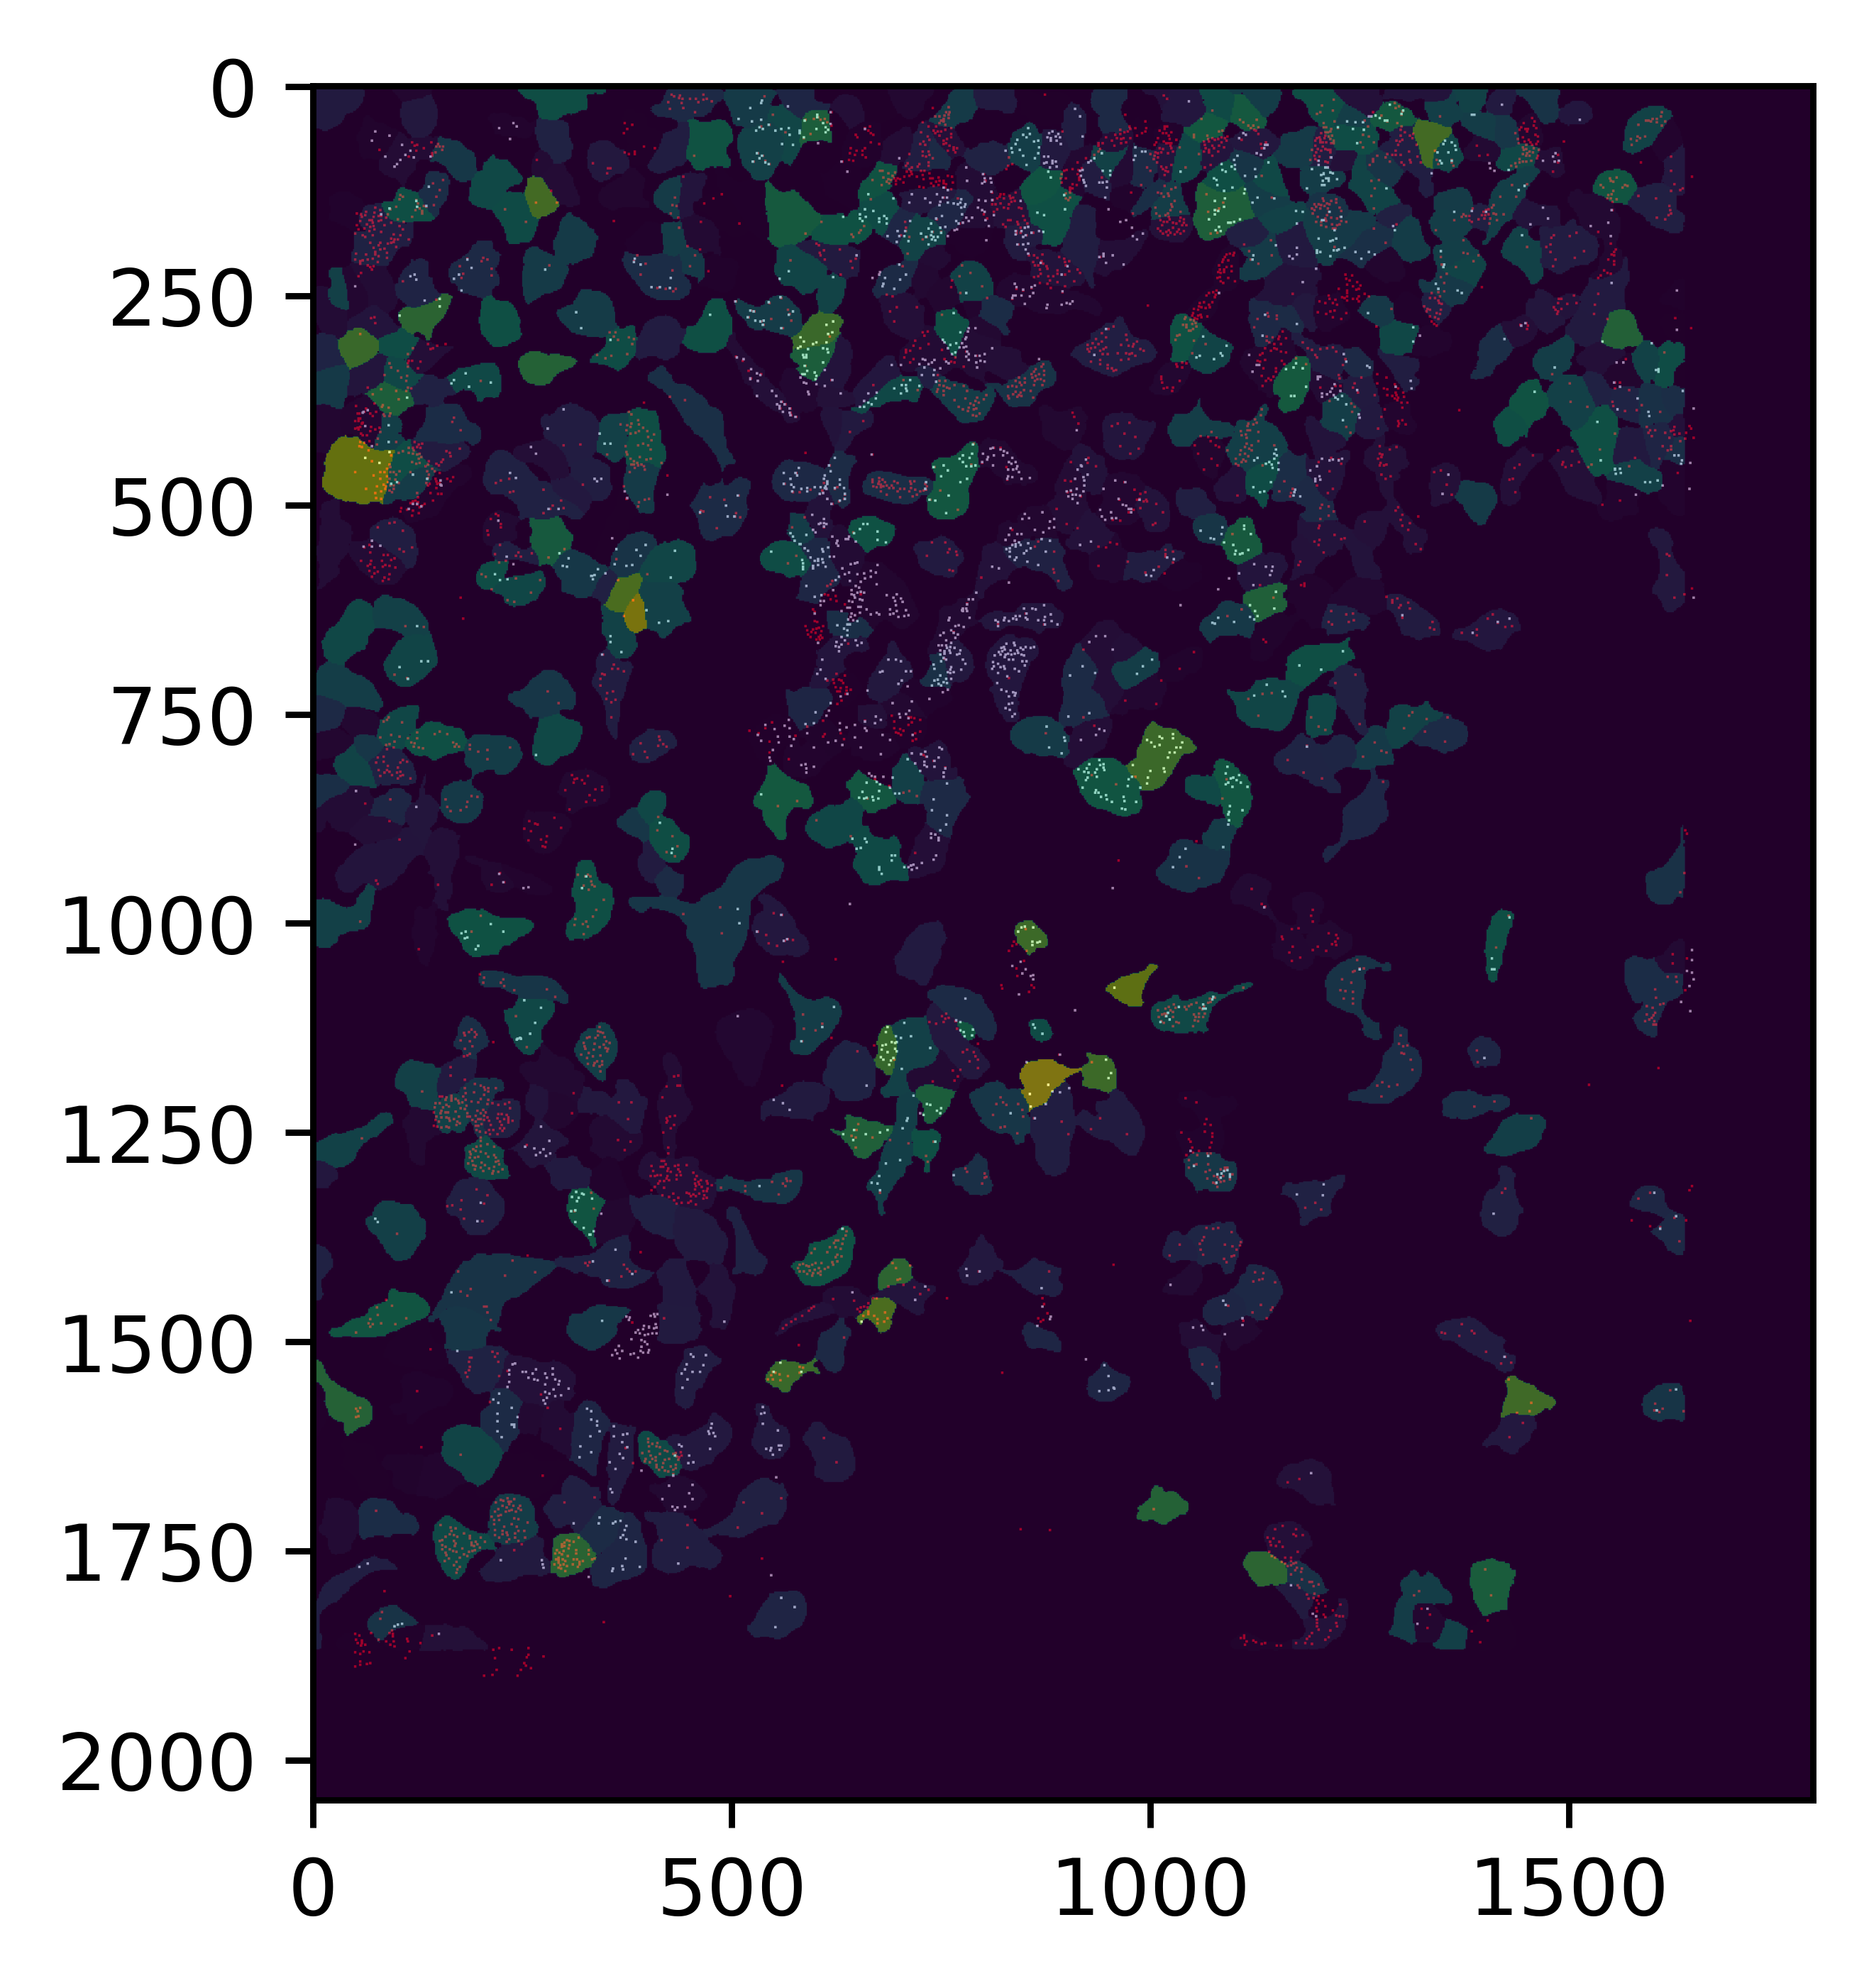

In [111]:
plt.figure(dpi=800)
plt.imshow(sumGFPMasks)
plt.axis('image')
plt.imshow(spotMask, alpha=0.5)
# this new image reduced mixing and looks like the codebook does not match the image-stack order

In [41]:
# # Cut the image - does not work: use shifting spotMask indices
# plt.figure(dpi=800)
# plt.imshow(np.array(sumGFPMasks)[up: down, left:right])
# plt.axis('image')
# plt.imshow(spotMask, alpha=0.5)

In [88]:
# spotMask = np.zeros((2048, 1792, 1))
# for i in range(len(test.index)):
#     xindex = test.loc[i, 'm2'] + left
#     yindex = test.loc[i, 'm1'] + up
#     spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = 20 * (test.loc[i,'j']+1)

# values = np.unique(spotMask.ravel())

# plt.figure(dpi=800)
# im = plt.imshow(spotMask, cmap='Set3')

# # get the colors of the values, according to the 
# # colormap used by imshow
# colors = [im.cmap(im.norm(value)) for value in values]

# # create a patch (proxy artist) for every color 
# patches = [mpatches.Patch(color=colors[i], label="{l}".format(l=values[i])) for i in range(len(values))]

# # put those patched as legend-handles into the legend
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

# plt.show()

In [102]:
# One color for each guide

up = 10
down = 1900
left = 50
right = 1650

test = pd.read_csv('../spot-calling/crisprmap20210506_layer1out0123_result_corr_thresh68_preprocessed.csv')
# The lowest threshold that does not cause mixing

spotMask = np.zeros((2048, 1792, 3))
for i in range(len(test.index)):
    xindex = test.loc[i, 'm2'] + left
    yindex = test.loc[i, 'm1'] + up
    guideID = test.loc[i,'j']
    
#     if guideID == 0:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (143,35,35) #
#     elif guideID == 1:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (185,215,237) #
#     elif guideID == 2:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (255,255,255) #
#     elif guideID == 3:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (170,0,255) #
#     elif guideID == 4:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (255,127,0) #
#     elif guideID == 5:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (191,255,0) #
#     elif guideID == 6:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (0,149,255) #
#     elif guideID == 7:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (255,0,170) #
#     elif guideID == 8:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (255,212,0) #
#     elif guideID == 9:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (106,255,0) #

# # the one shown in the colors picture
#     if guideID == 0:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (0,100,0) #
#     elif guideID == 1:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (0,0,139) #
#     elif guideID == 2:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (176, 48, 96) #
#     elif guideID == 3:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (255, 69, 0) #
#     elif guideID == 4:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (255, 255, 0) #
#     elif guideID == 5:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (0,255,0) #
#     elif guideID == 6:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (0,255,255) #
#     elif guideID == 7:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (255,0,255) #
#     elif guideID == 8:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (100, 149, 237) #
#     elif guideID == 9:
#         spotMask[yindex-1:yindex+2, xindex-1:xindex+2] = (255, 228, 181) #

    if guideID == 0:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (0,0,255) #
    elif guideID == 1:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (0,255,0) #
    elif guideID == 2:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (255,0,0) #
    elif guideID == 3:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (0,255,255) #
    elif guideID == 4:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (255,0,255) #
    elif guideID == 5:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (255,255,0) #
    elif guideID == 6:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (255,127,0) #
    elif guideID == 7:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (0,127,0) #
    elif guideID == 8:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (127,0,0) #
    elif guideID == 9:
        spotMask[yindex-2:yindex+2, xindex-1:xindex+2] = (255,255,255) #

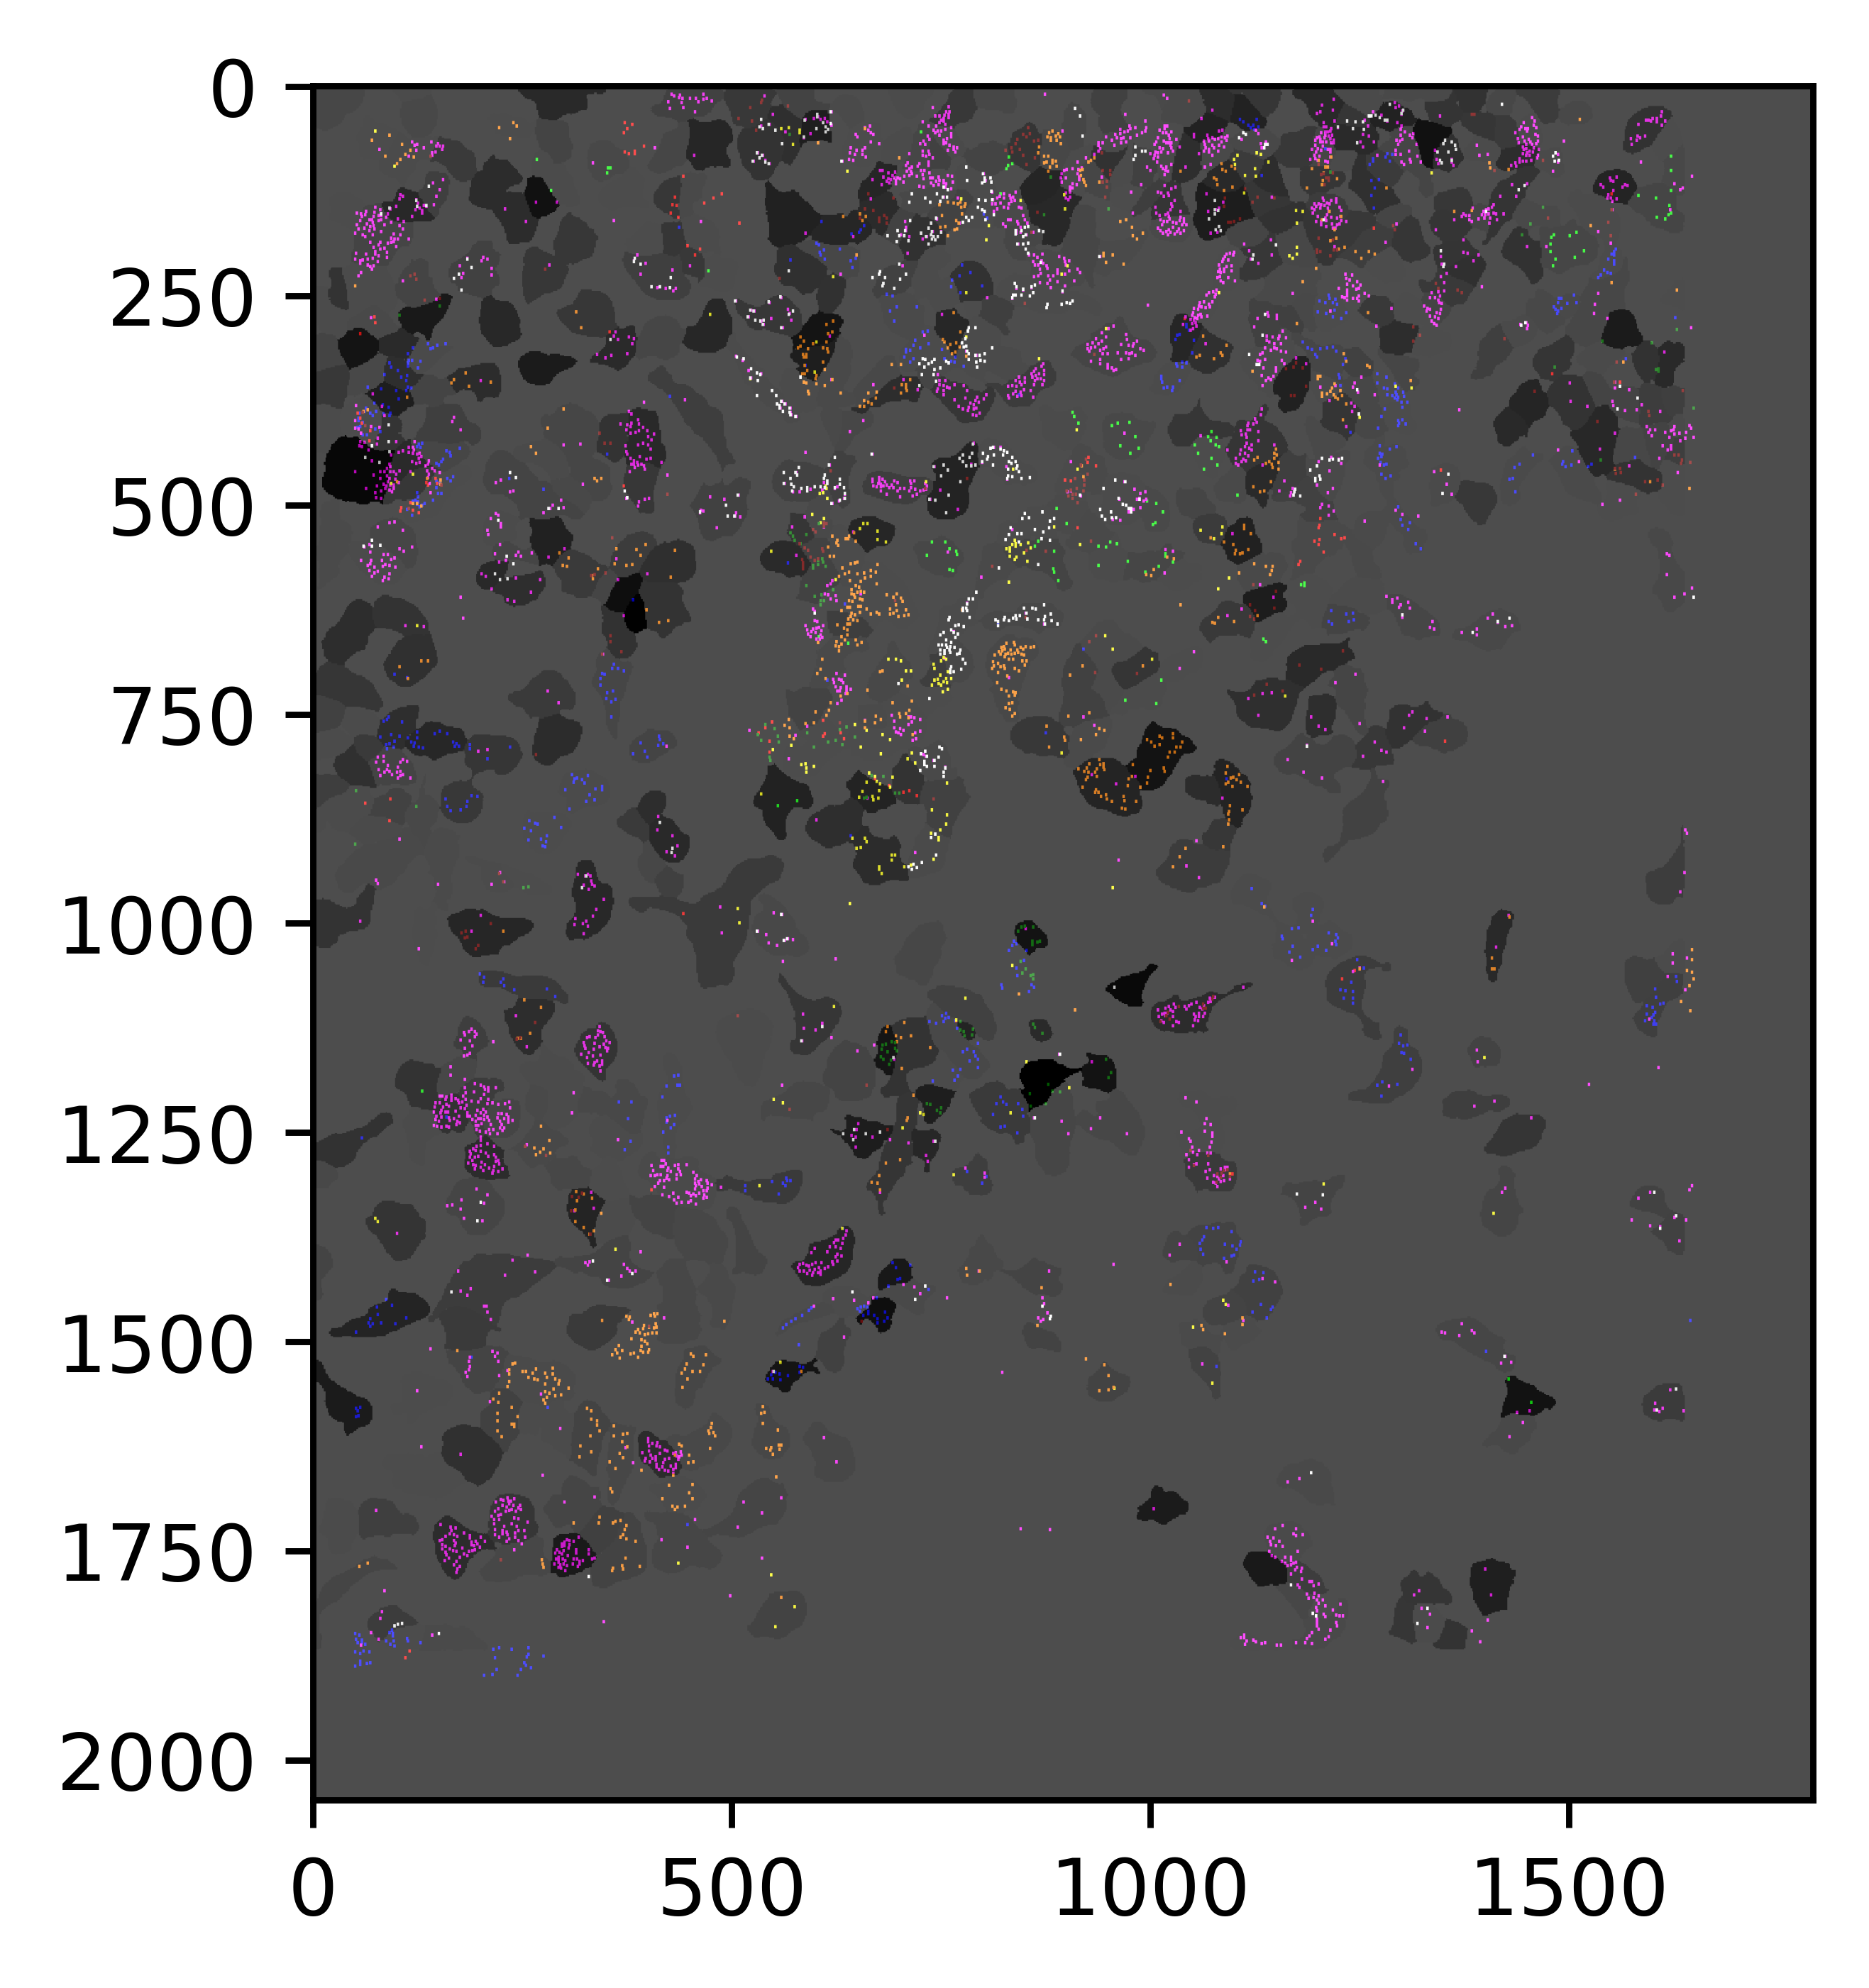

In [109]:
plt.figure(dpi=800)
plt.imshow(sumGFPMasks, cmap='Greys')
# plt.imshow(sumGFPMasks)
plt.axis('image')
plt.imshow(spotMask.astype(np.uint8), alpha=0.7)

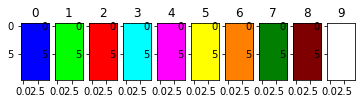

In [101]:
color_dict = {
    0: (0,0,255),
    1: (0,255,0),
    2: (255, 0, 0),
    3: (0,255,255),
    4: (255,0,255),
    5: (255,255,0),
    6: (255,127,0),
    7: (0,127,0),
    8: (127,0,0),
    9: (255,255,255)
}

color_box = np.zeros((10, 5, 3))

for i in range(10): 
    plt.subplot(1, 10, i+1)
    color_box[:, :, :] = color_dict[i]
    plt.imshow(color_box.astype(np.uint8))
    plt.title(i)

In [53]:
# img_colors = mpimg.imread('./data/colors.png')
# plt.imshow(img_colors)

###
# darkgreen #006400

# darkblue #00008b

# maroon3 #b03060

# orangered #ff4500

# yellow #ffff00

# lime #00ff00

# aqua #00ffff

# fuchsia #ff00ff

# cornflower #6495ed

# moccasin #ffe4b5

###

In [65]:
# test_iterative = pd.read_csv('./data/crisprmap20210506_layer1out0123_result_iterative_reg_thresh10.csv')
# print(np.unique(test_iterative['j']))
# spotMask_iterative = np.zeros((2048, 1792, 3))
# for i in range(len(test_iterative.index)):
#     xindex = test_iterative.loc[i, 'm2']
#     yindex = test_iterative.loc[i, 'm1']
#     guideID = test_iterative.loc[i,'j']
#     if guideID <= 4:
#         spotMask_iterative[yindex-1:yindex+1, xindex-1:xindex+1] = (1, 0, 0) # red spots are GPP targeting (dark cells)
#     else:
#         spotMask_iterative[yindex-1:yindex+1, xindex-1:xindex+1] = (1, 1, 1) # white spots are control (bright cells)

[0 1 2 3 4 5 6 7 8 9]


In [17]:
# plt.figure(dpi=800)
# plt.imshow(sumGFPMasks)
# plt.axis('image')
# plt.imshow(spotMask_iterative, alpha=0.5)

In [8]:
# plt.figure(dpi=300)
# plt.imshow(avgGFPMasks)
# plt.axis('image')

In [3]:
# # Original cell & nuclei segmentation mask with IDs
# masks_mem = hf["Cell Seg Mask"]
# masks_nuc = hf["Nuc Seg Mask"]

(-0.5, 1791.5, 2047.5, -0.5)

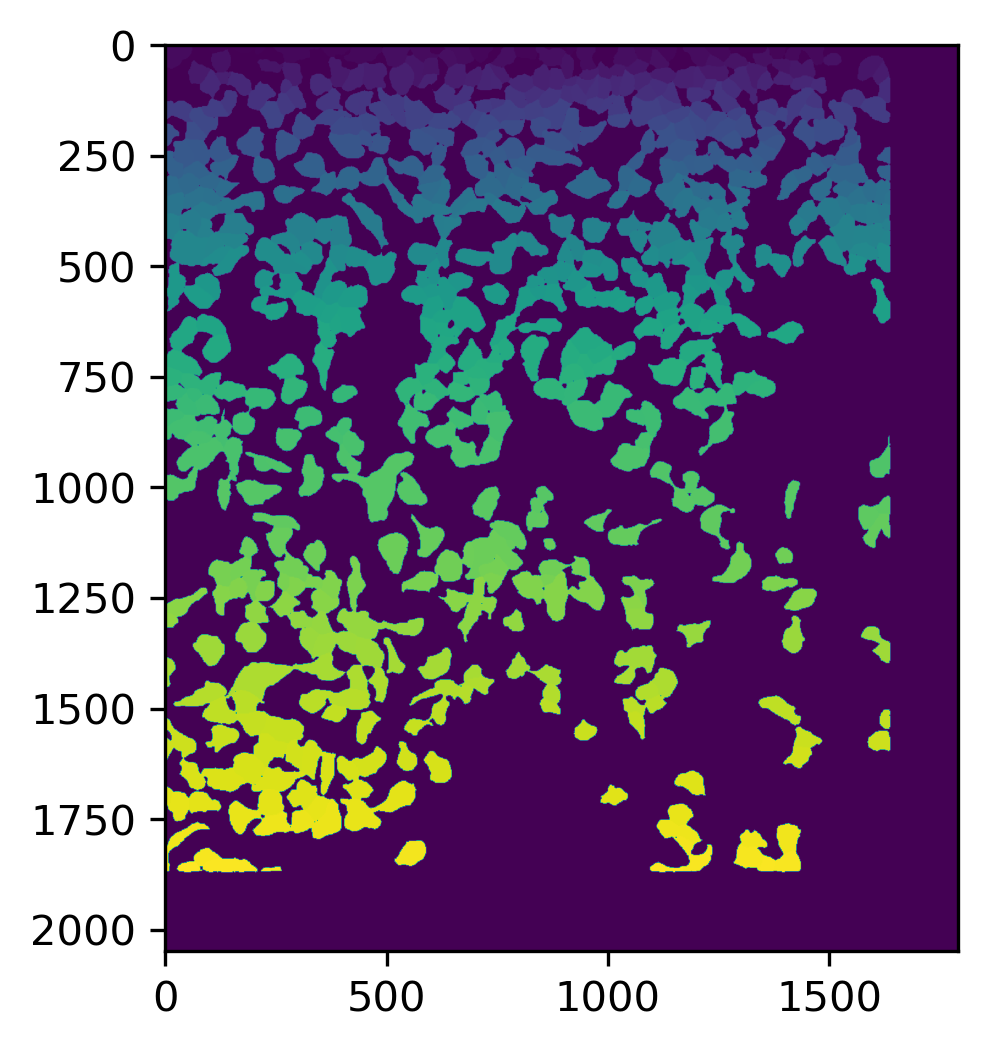

In [4]:
# plt.figure(dpi=300)
# plt.imshow(masks_mem)
# plt.axis('image')

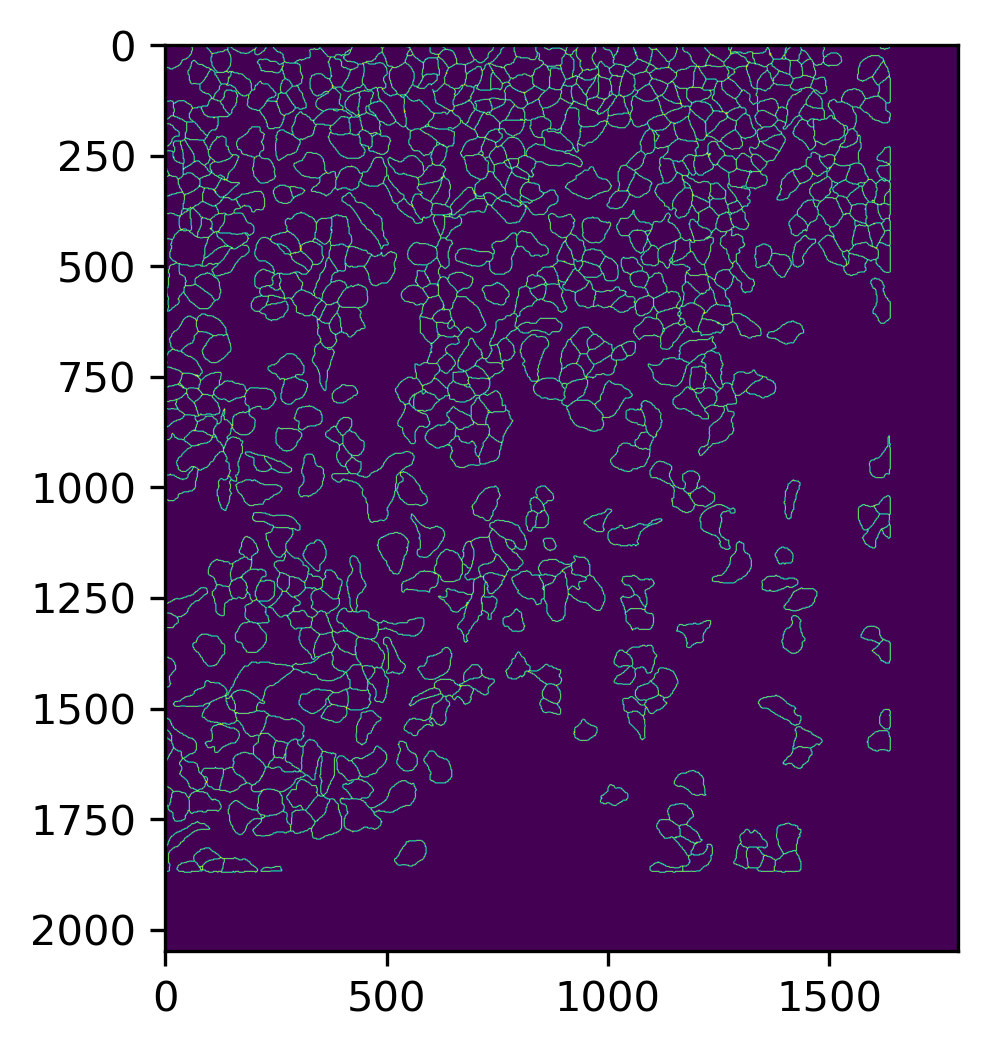

In [6]:
# plt.figure(dpi=300)
# bound_mem = find_boundaries(masks_mem, connectivity=1, mode='thick', background=0)
# plt.imshow(bound_mem)

<Figure size 1800x1200 with 0 Axes>

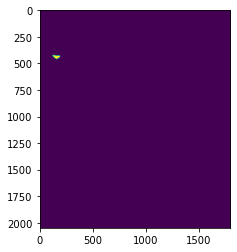

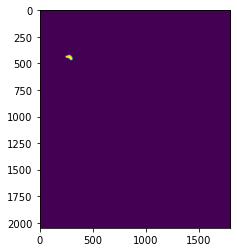

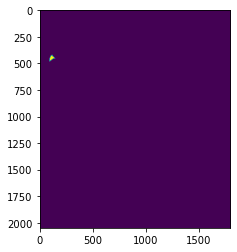

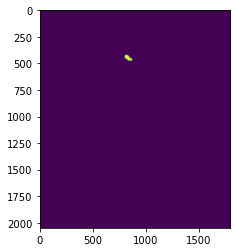

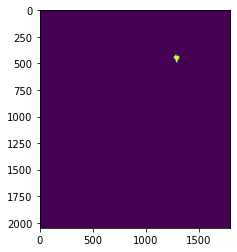

In [16]:
# # check if the segments are marked by numbers
# plt.figure(dpi=300)
# for i in range(300, 305):
#     plt.figure()
#     plt.imshow(np.array(masks_mem)==i)

(-0.5, 1791.5, 2047.5, -0.5)

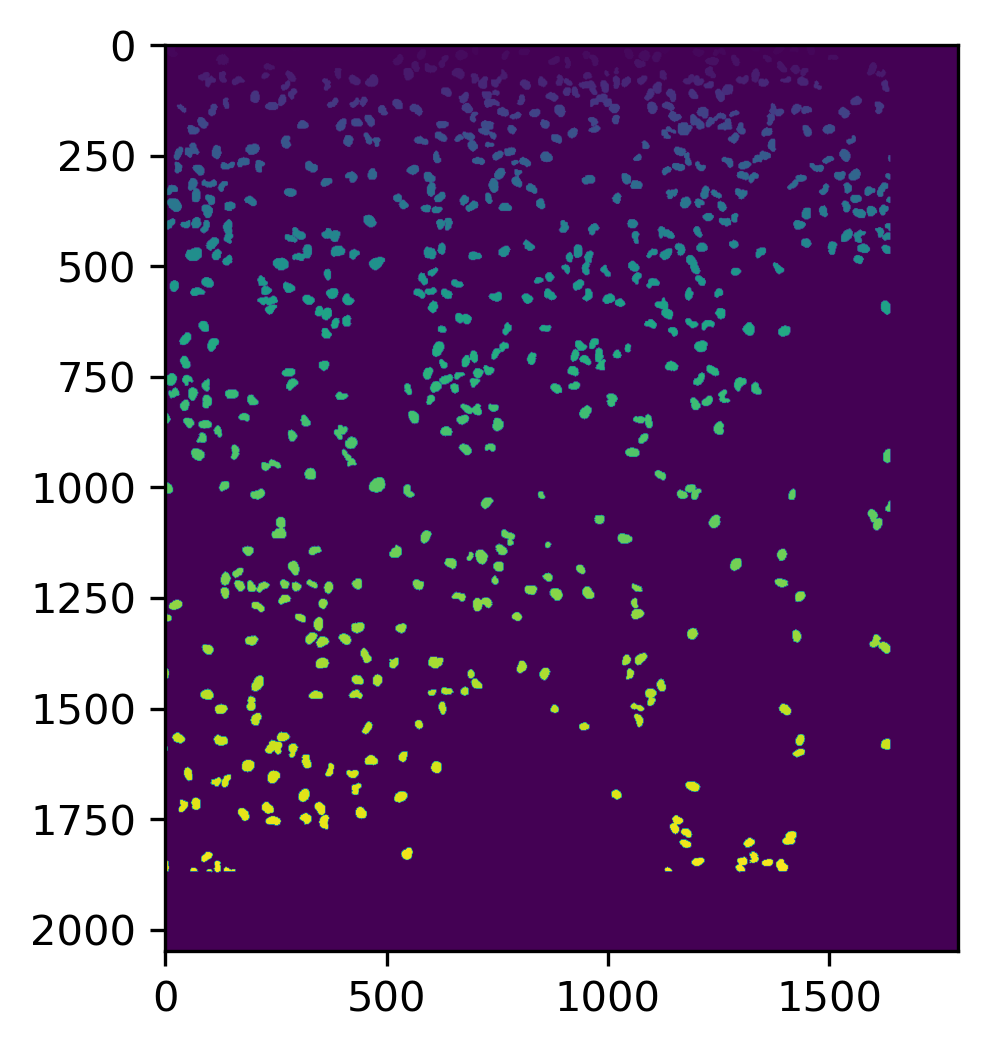

In [13]:
# plt.figure(dpi=300)
# plt.imshow(masks_nuc)
# plt.axis('image')

In [11]:
np.array(masks_nuc)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
# hf.close()

In [15]:
# #Dict structure - membrane_dict[membraneID]["Nuclei Sum GFP"]
# #               - membrane_dict[membraneID]['Nuclei Avg GFP']
# #               - membrane_dict[membraneID]['Membrane Sum GFP']
# #               - membrane_dict[membraneID]['Membrane Avg GFP']

# filehandler = open("./data/Ben_GFPVal_Per_MembraneID_2021-06-22.pickle", 'rb')
# membrane_dict = pickle.load(filehandler)
# membrane_dict

{2: {'Nuclei Sum GFP': 23.926829268292686,
  'Nuclei Avg GFP': 0.2136324041811847,
  'Membrane Sum GFP': 47.72357723577236,
  'Membrane Avg GFP': 0.09142447746316544},
 3: {'Nuclei Sum GFP': 8.959349593495935,
  'Nuclei Avg GFP': 0.04869211735595617,
  'Membrane Sum GFP': 34.8130081300813,
  'Membrane Avg GFP': 0.04980401735347825},
 5: {'Nuclei Sum GFP': 25.11382113821138,
  'Nuclei Avg GFP': 0.0868990350803162,
  'Membrane Sum GFP': 40.430894308943095,
  'Membrane Avg GFP': 0.029816293738158625},
 8: {'Nuclei Sum GFP': 0.2764227642276423,
  'Nuclei Avg GFP': 0.0017949530144652096,
  'Membrane Sum GFP': 3.1463414634146343,
  'Membrane Avg GFP': 0.002195632563443569},
 9: {'Nuclei Sum GFP': 105.66666666666667,
  'Nuclei Avg GFP': 0.28102836879432624,
  'Membrane Sum GFP': 140.8130081300813,
  'Membrane Avg GFP': 0.13296790191697952},
 10: {'Nuclei Sum GFP': 37.0,
  'Nuclei Avg GFP': 0.10946745562130178,
  'Membrane Sum GFP': 71.6341463414634,
  'Membrane Avg GFP': 0.050553384856360906}

In [16]:
filehandler.close()